# Customer Churn Dataset

## Import necessary libraries

In [39]:
%pip install -q imblearn

StatementMeta(, 73219ee6-ec4b-4138-92c4-30322dc97035, 50, Finished, Available, Finished)


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.



In [40]:
import imblearn
import mlflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

StatementMeta(, 73219ee6-ec4b-4138-92c4-30322dc97035, 52, Finished, Available, Finished)

## Take a first look at our dataset

In [41]:
DATA_ROOT = "/lakehouse/default"
DATA_FOLDER = "/Files"  
DATA_FILE = "churn.csv"  

StatementMeta(, 73219ee6-ec4b-4138-92c4-30322dc97035, 53, Finished, Available, Finished)

In [42]:
churn_data_path = f"{DATA_ROOT}{DATA_FOLDER}/{DATA_FILE}"

StatementMeta(, 73219ee6-ec4b-4138-92c4-30322dc97035, 54, Finished, Available, Finished)

In [43]:
churn_df = pd.read_csv(churn_data_path)
churn_df.head()

StatementMeta(, 73219ee6-ec4b-4138-92c4-30322dc97035, 55, Finished, Available, Finished)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [44]:
# churn_df.info()

StatementMeta(, 73219ee6-ec4b-4138-92c4-30322dc97035, 56, Finished, Available, Finished)

In [45]:
display(churn_df, summary=True)

StatementMeta(, 73219ee6-ec4b-4138-92c4-30322dc97035, 57, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 624a35ed-1d9a-4cb6-915b-07bea1a2f617)

## Data cleaning

In [46]:
# Code generated by Data Wrangler for pandas DataFrame

def clean_data(churn_df):
    # Drop rows with missing data across all columns
    churn_df.dropna(inplace=True)
    # Drop duplicate rows in columns: 'RowNumber', 'CustomerId'
    churn_df = churn_df.drop_duplicates(subset=['RowNumber', 'CustomerId'])
    # Drop columns: 'CustomerId', 'RowNumber', 'Surname'
    churn_df = churn_df.drop(columns=['CustomerId', 'RowNumber', 'Surname'])
    return churn_df

churn_df_clean = clean_data(churn_df.copy())
display(churn_df_clean.iloc[:5])

StatementMeta(, 73219ee6-ec4b-4138-92c4-30322dc97035, 58, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 56066240-afb3-4812-8dbd-86ff5feafc0c)

## EDA

In [ ]:
sns.set_style("whitegrid") # A clean and widely used style
sns.set_context("talk")

In [48]:
target_var_col = "Exited"

numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

StatementMeta(, 73219ee6-ec4b-4138-92c4-30322dc97035, 60, Finished, Available, Finished)

### Stats for numerical columns

In [49]:
stats_df_numerical = pd.DataFrame()
for col in numerical_cols:
    stats = {
        'Count': churn_df_clean[col].count(),
        'Mean': churn_df_clean[col].mean(),
        # 'Median': churn_df_clean[col].median(),
        # 'Mode': churn_df_clean[col].mode().iloc[0] if not churn_df_clean[col].mode().empty else 'N/A',
        # 'Std': churn_df_clean[col].std(),
        # 'Variance': churn_df_clean[col].var(),
        'Min': churn_df_clean[col].min(),
        'Q1': churn_df_clean[col].quantile(0.25),
        'Q3': churn_df_clean[col].quantile(0.75),
        'Max': churn_df_clean[col].max(),
        # 'Range': churn_df_clean[col].max() - churn_df_clean[col].min(),
        # 'IQR': churn_df_clean[col].quantile(0.75) - churn_df_clean[col].quantile(0.25),
        'Skewness': churn_df_clean[col].skew(),
        }
    stats_df_numerical[col] = stats
    
stats_df_numerical.round(3)

StatementMeta(, 73219ee6-ec4b-4138-92c4-30322dc97035, 61, Finished, Available, Finished)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
Count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
Mean,650.529,38.922,5.013,76485.889,1.530,100090.240
Min,350.000,18.000,0.000,0.000,1.000,11.580
Q1,584.000,32.000,3.000,0.000,1.000,51002.110
Q3,718.000,44.000,7.000,127644.240,2.000,149388.248
Max,850.000,92.000,10.000,250898.090,4.000,199992.480
Skewness,-0.072,1.011,0.011,-0.141,0.746,0.002


StatementMeta(, 73219ee6-ec4b-4138-92c4-30322dc97035, 62, Finished, Available, Finished)

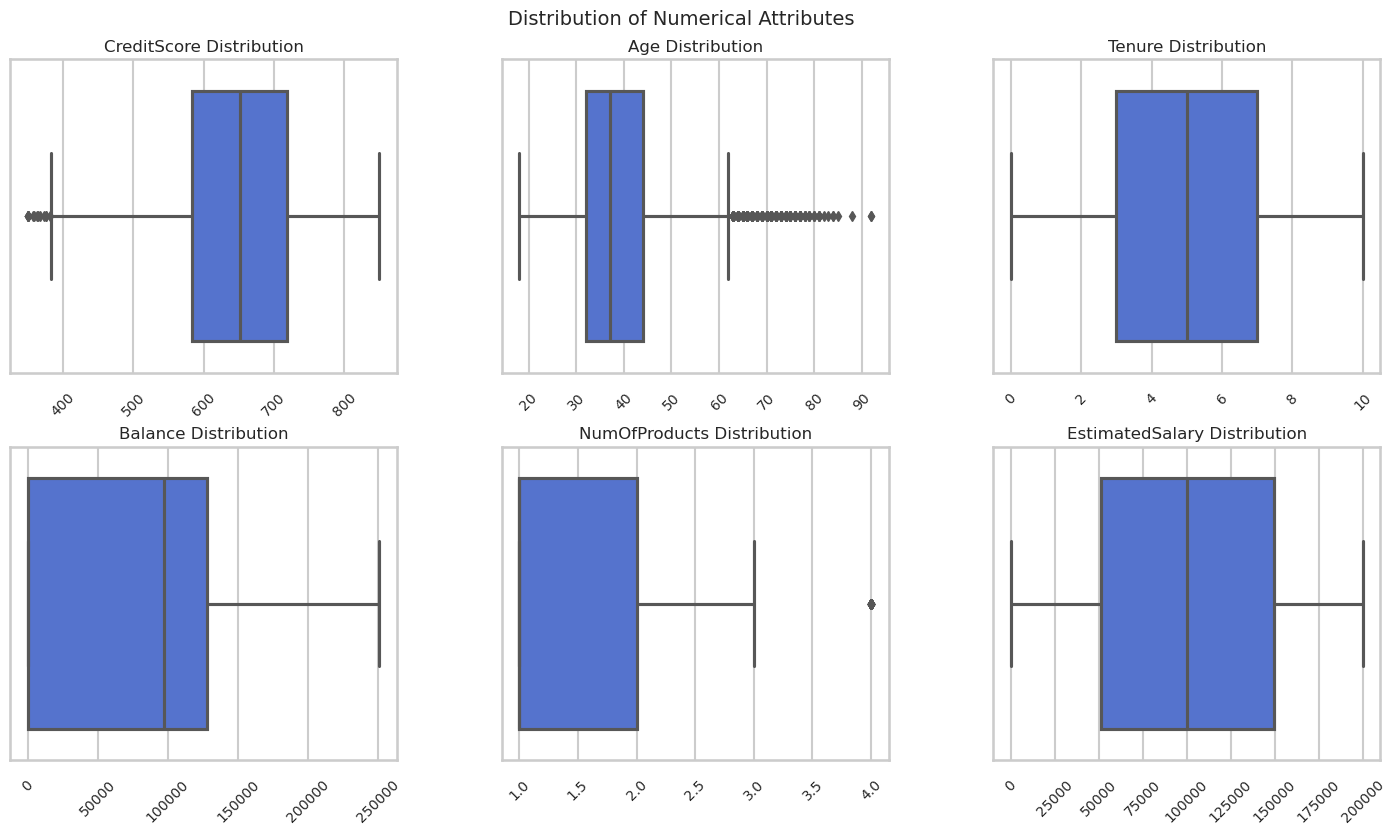

In [50]:
num_cols = len(numerical_cols)
n_rows = 2
n_cols = 3

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 8))
fig.tight_layout(pad=1.0)

for i, col in enumerate(numerical_cols):
    row = i // n_cols
    col_idx = i % n_cols
    ax = axes[row, col_idx]

    sns.boxplot(x=churn_df_clean[col], ax=ax, color='royalblue')
    ax.set_title(f'{col} Distribution', fontsize=12)
    ax.set_xlabel("")
    ax.tick_params(axis='x', labelsize=10, rotation=45) 


fig.suptitle('Distribution of Numerical Attributes', fontsize=14, y=1.02) 
plt.show()

**Observation:** There are some right-skewed columns namely: *Balance, Age, NumOfProducts* \
 **Solve:** SMOTE with 70:30 or 60:40 ratio

### Summary for categorical columns

In [51]:
for col in categorical_cols:
    print(f"\n{col} Distribution:")
    col_values = churn_df[col].unique()
    freq_table = churn_df[col].value_counts()
    freq_pct = churn_df[col].value_counts(normalize=True) * 100
        
    summary = pd.DataFrame({
        'Value': col_values,
        'Count': freq_table,
        'Percentage': freq_pct.round(2)
        })
    display(summary)
    # summary.style

StatementMeta(, 73219ee6-ec4b-4138-92c4-30322dc97035, 63, Finished, Available, Finished)


Geography Distribution:


SynapseWidget(Synapse.DataFrame, 93916016-bbd1-40fe-883b-1eab6bae0fbc)


Gender Distribution:


SynapseWidget(Synapse.DataFrame, 18d986bb-abd9-4ded-8408-354148c5eeb3)


HasCrCard Distribution:


SynapseWidget(Synapse.DataFrame, 89ed5505-4602-4b69-9e71-f691e317f70b)


IsActiveMember Distribution:


SynapseWidget(Synapse.DataFrame, a420d2f6-de0e-4b4c-ae87-3ce5da2ec49a)

### Look into Churn Rate

In [52]:
churn_rate = churn_df_clean['Exited'].mean() * 100
total_customers = len(churn_df_clean)
churned_customers = churn_df_clean['Exited'].sum()
retained_customers = total_customers - churned_customers

print(f"Total Customers: {total_customers:,}")
print(f"Churned Customers: {churned_customers:,}")
print(f"Retained Customers: {retained_customers:,}")
print(f"Avg Churn Rate: {churn_rate:.2f}%")
print(f"Retention Rate: {100-churn_rate:.2f}%")

StatementMeta(, 73219ee6-ec4b-4138-92c4-30322dc97035, 64, Finished, Available, Finished)

Total Customers: 10,000
Churned Customers: 2,037
Retained Customers: 7,963
Avg Churn Rate: 20.37%
Retention Rate: 79.63%


In [53]:
churn_analysis = {}
for col in categorical_cols:
    analysis = churn_df_clean.groupby(col)['Exited'].agg([
        'count', 'sum', 'mean'
    ]).round(4)
    analysis.columns = ['Total_Customers', 'Churned', 'Churn_Rate']
    
    churn_analysis[col] = analysis
    
    
    print("-"*60)
    print(f"\n{col}:")
    display(analysis)

StatementMeta(, 73219ee6-ec4b-4138-92c4-30322dc97035, 65, Finished, Available, Finished)

------------------------------------------------------------

Geography:


SynapseWidget(Synapse.DataFrame, 35e9f890-87e7-4aae-bc93-a4bd6fa15968)

------------------------------------------------------------

Gender:


SynapseWidget(Synapse.DataFrame, 56bc56db-140a-43f0-bb84-1b6ea1136bba)

------------------------------------------------------------

HasCrCard:


SynapseWidget(Synapse.DataFrame, 2ca83cec-de13-43c9-8092-c8eff6e4a8be)

------------------------------------------------------------

IsActiveMember:


SynapseWidget(Synapse.DataFrame, a5d92e03-160f-4bea-8948-83006aea9d55)

In [54]:
print(numerical_cols)

StatementMeta(, 73219ee6-ec4b-4138-92c4-30322dc97035, 66, Finished, Available, Finished)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']


### Distribution of churned vs retained customers, across the numerical columns

StatementMeta(, 73219ee6-ec4b-4138-92c4-30322dc97035, 114, Finished, Available, Finished)

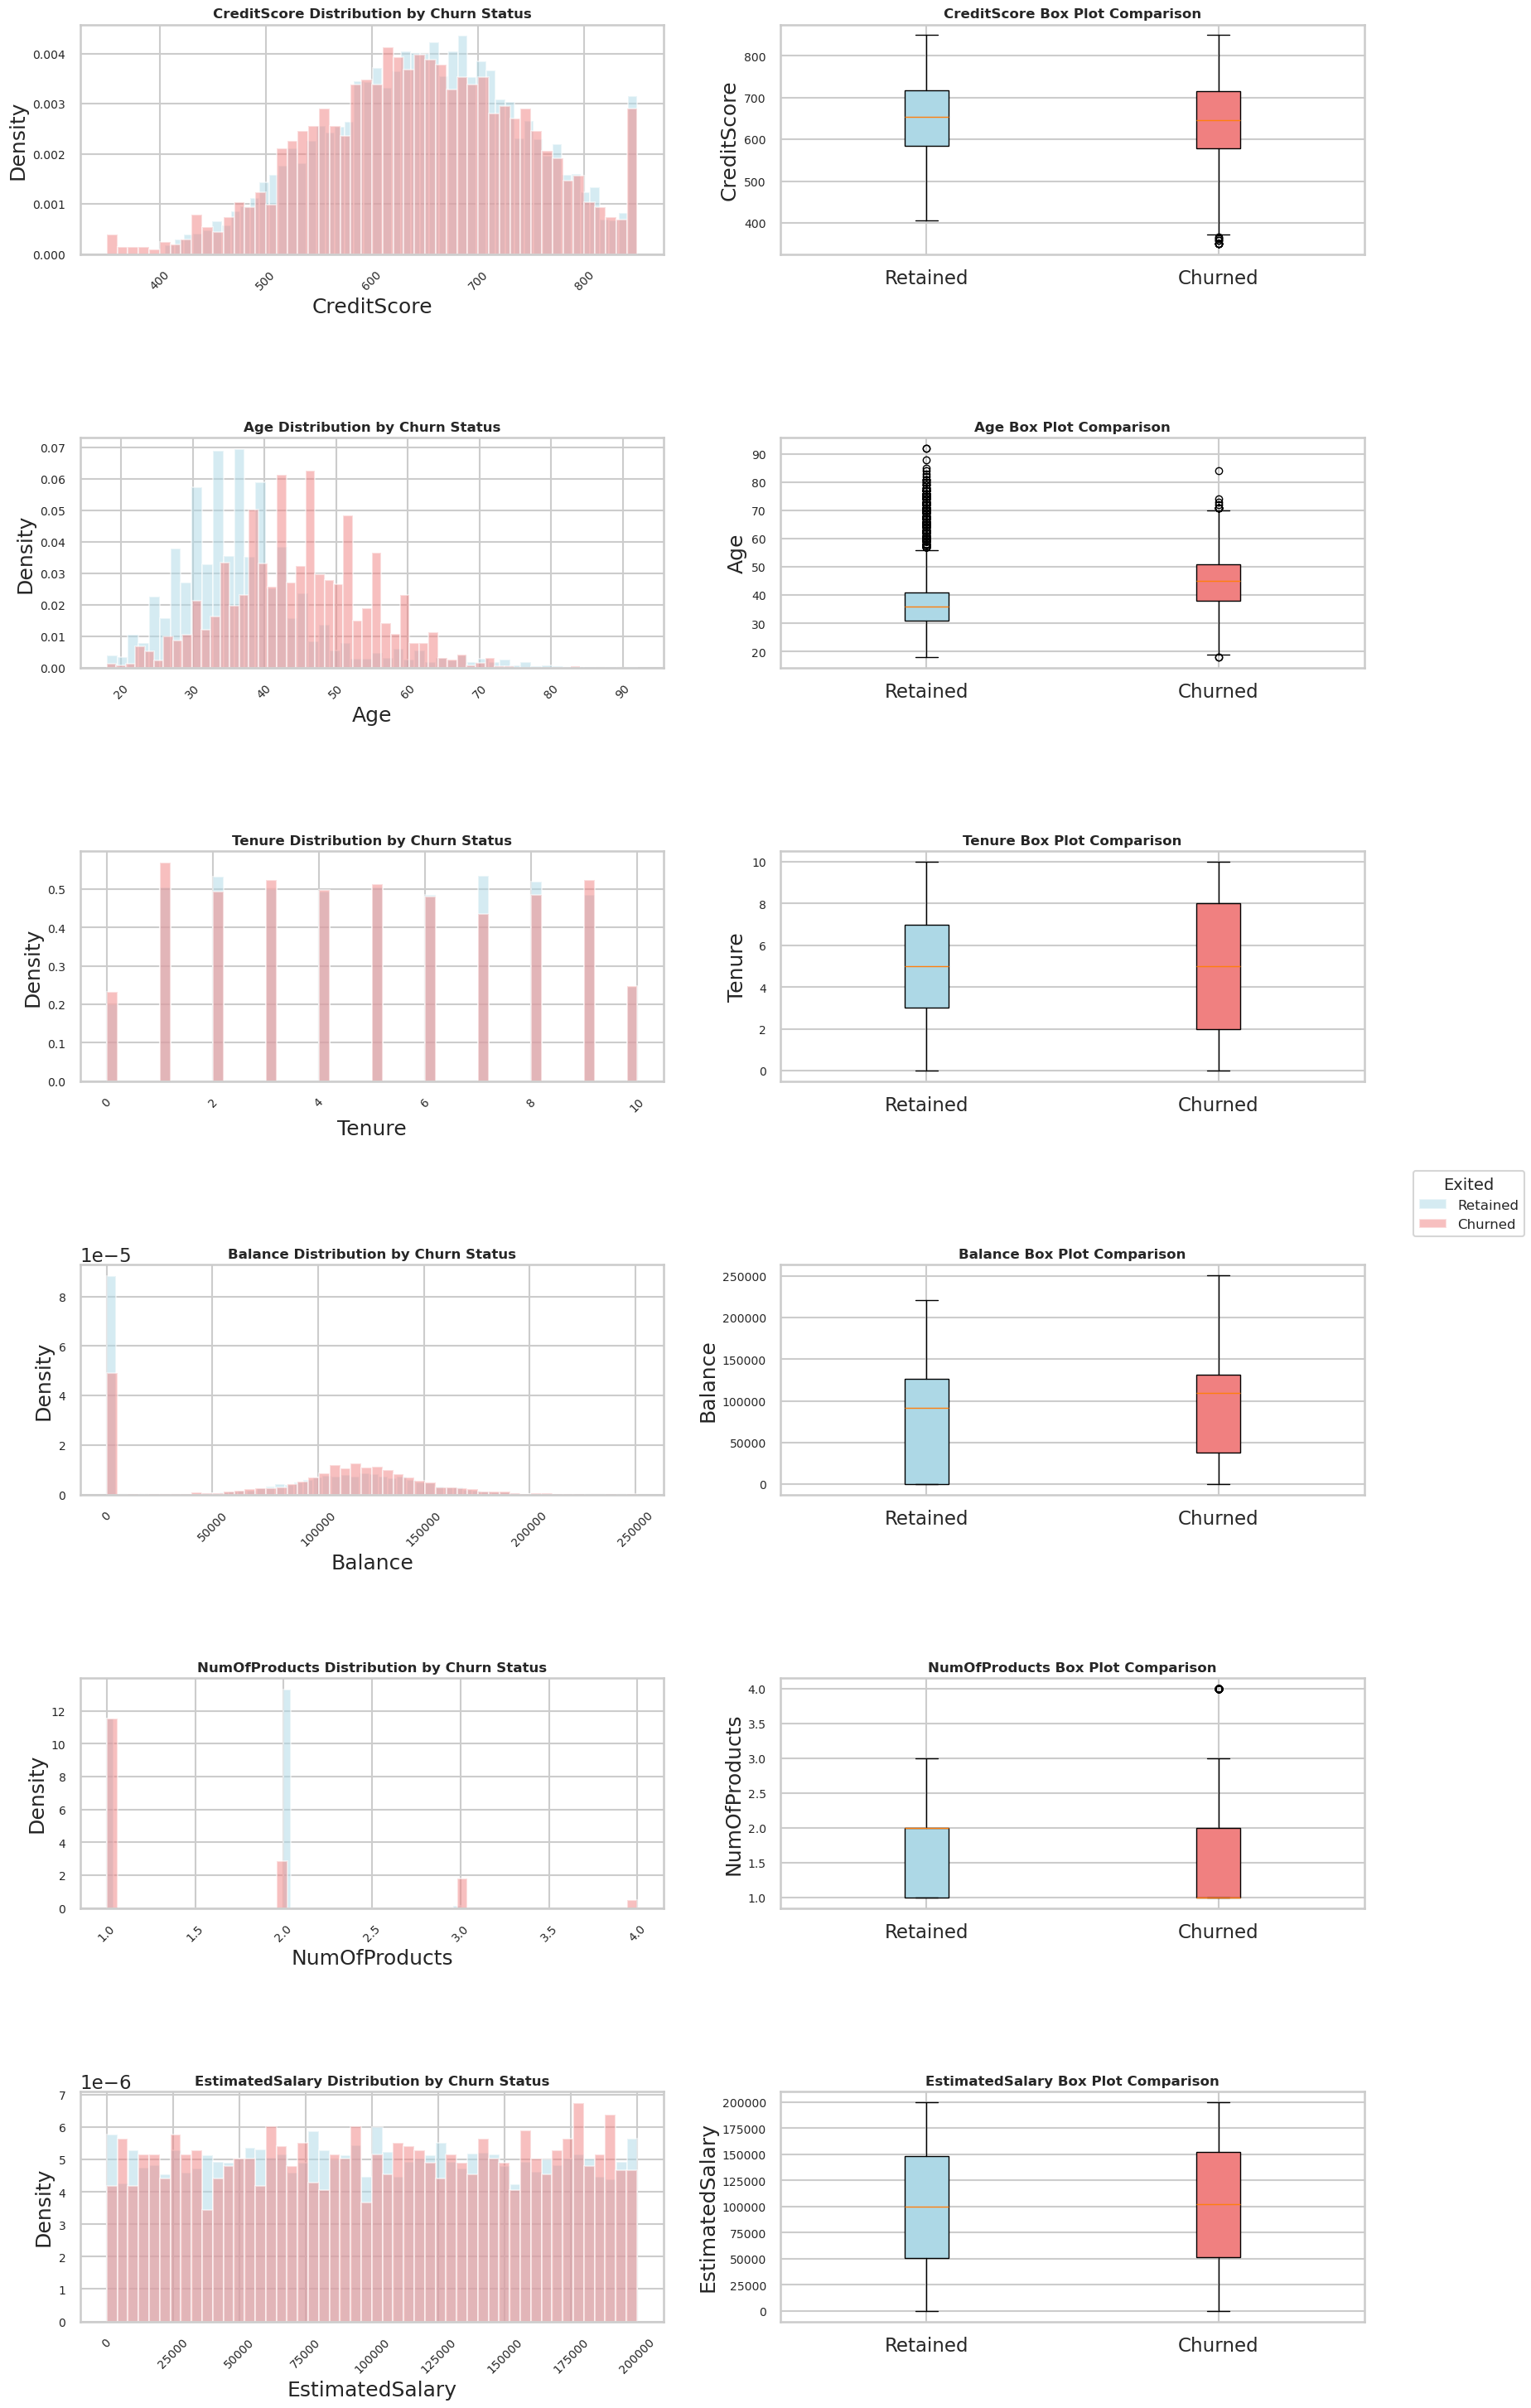

In [102]:
fig = plt.figure(figsize=(20,36))
gs = GridSpec(6,2, figure=fig, hspace=.8, wspace=.2)

def churn_histogram_num_cols(ax, col_name, retained_data, churned_data):
    """Generates a histogram for churn status."""
    ax.hist(retained_data, bins=50, alpha=0.5, label='Retained', color='lightblue', density=True)
    ax.hist(churned_data, bins=50, alpha=0.5, label='Churned', color='lightcoral', density=True)
    ax.set_xlabel(col_name)
    ax.set_ylabel('Density')
    ax.tick_params(axis='x', labelsize=10, rotation=45)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_title(f'{col_name} Distribution by Churn Status', fontsize=12, fontweight='bold')

def churn_box_plot_num_cols(ax, col_name, retained_data, churned_data):
    """Generates a box plot for churn status."""
    box_data = [retained_data, churned_data]
    bp = ax.boxplot(box_data, labels=['Retained', 'Churned'], patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][1].set_facecolor('lightcoral')
    ax.set_ylabel(col_name)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_title(f'{col_name} Box Plot Comparison', fontsize=12, fontweight='bold')

handles, labels = [],[] # Initialize handles and labels for the legend

for i, col_name in enumerate(numerical_cols):
    churned = churn_df_clean[churn_df_clean['Exited'] == 1][col_name]
    retained = churn_df_clean[churn_df_clean['Exited'] == 0][col_name]

    # Histogram
    ax_hist = fig.add_subplot(gs[i, 0])
    churn_histogram_num_cols(ax_hist, col_name, retained, churned)
    if not handles:
        handles, labels = ax_hist.get_legend_handles_labels()

    # Box Plot
    ax_box = fig.add_subplot(gs[i, 1])
    churn_box_plot_num_cols(ax_box, col_name, retained, churned)

fig.legend(handles, labels, title='Exited', loc='center right', fontsize=12, title_fontsize=14)
fig.subplots_adjust(hspace=0.7, right=0.9)
plt.show()

### Distribution of Churned and Retained customer across categorical columns

StatementMeta(, 73219ee6-ec4b-4138-92c4-30322dc97035, 108, Finished, Available, Finished)

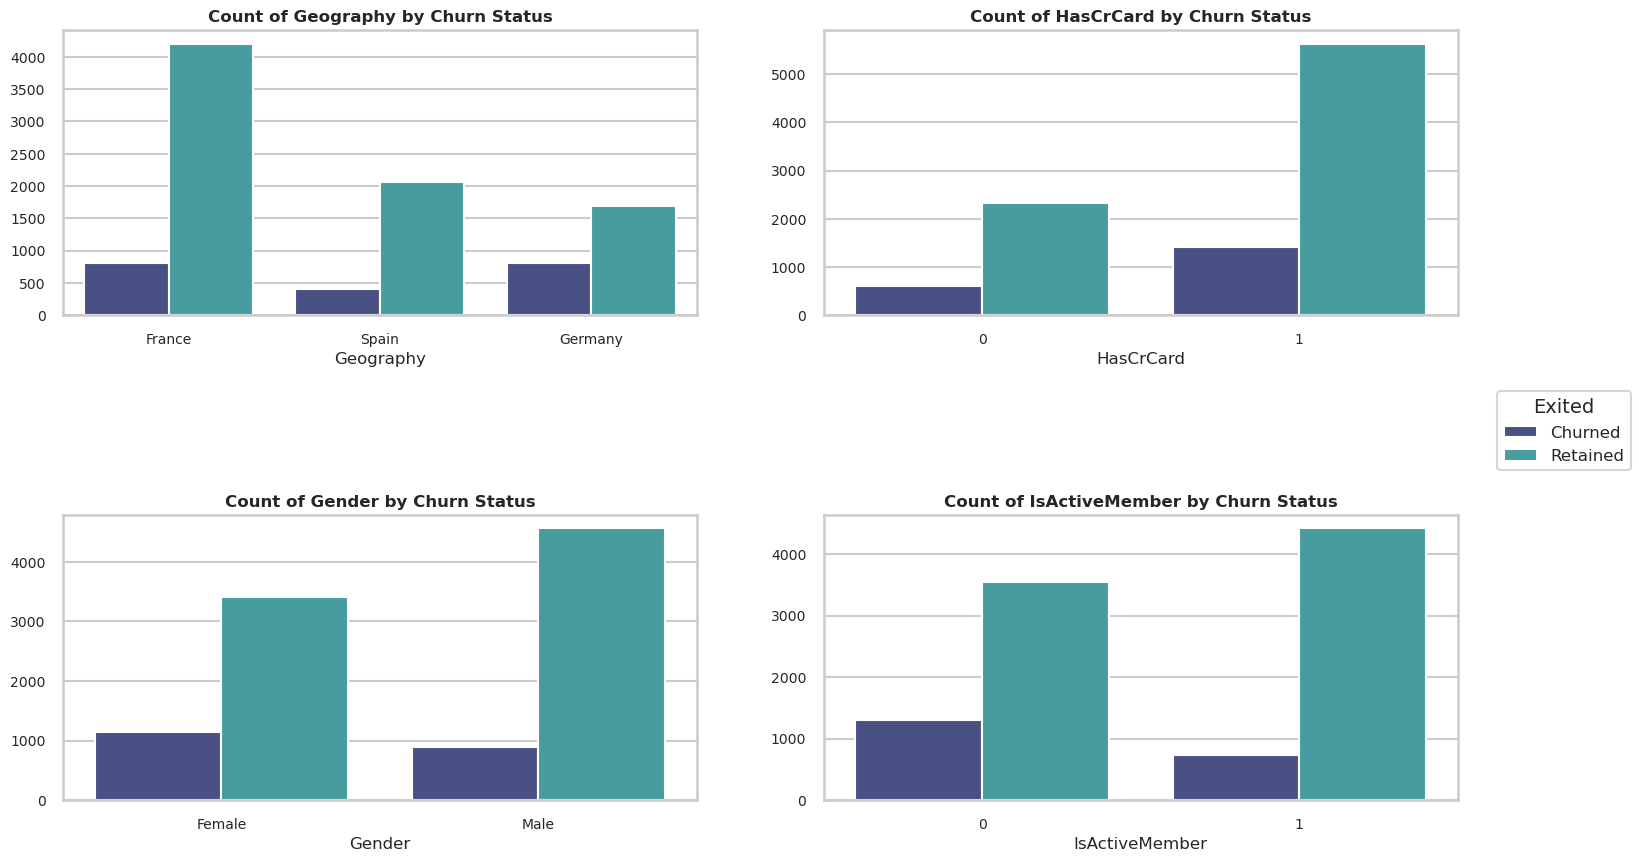

In [96]:
# attr_list = categorical_cols.copy()
# attr_list.append("NumOfProducts")
fig, axarr = plt.subplots(2, 2, figsize=(18, 10))

handles = []
labels = []

for i, col in enumerate(categorical_cols):
    ax = axarr[i%2][i//2]
    sns.countplot(x=col, data=churn_df_clean, hue=churn_df_clean['Exited'].astype(str), 
                  ax=ax, palette="mako")
    ax.set_title(f'Count of {col} by Churn Status', fontsize=12, fontweight='bold')
    ax.tick_params(axis='y', labelsize=10) 
    ax.tick_params(axis='x', labelsize=10) 

    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("")
    handles, labels = ax.get_legend_handles_labels()
    labels = ["Churned", "Retained"]
    ax.legend_.remove()



fig.legend(handles, labels, title='Exited', loc='center right', fontsize=12, title_fontsize=14)

fig.subplots_adjust(hspace=0.7, right=0.9)

# fig.delaxes(axarr[1][2])
plt.show()

### Perform some statistical tests

In [104]:
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind

StatementMeta(, 73219ee6-ec4b-4138-92c4-30322dc97035, 116, Finished, Available, Finished)

In [106]:
def perform_chi_square_tests(df, target_col, cat_cols):
    """
    Perform Chi-square tests for categorical variables against the target variable
    """
    print("CHI-SQUARE TESTS (Categorical vs Churn):")

    print("H0: No association between variable and churn")
    print("H1: Association exists between variable and churn")

    print("-" * 60)

    for col in cat_cols:
        contingency_table = pd.crosstab(df[col], df[target_col])
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)

        significance = "Significant" if p_value < 0.05 else "Not Significant"
        print(f"{col}:")
        print(f"  Chi-square: {chi2:.4f}")
        print(f"  p-value: {p_value:.6f}")
        print(f"  Result: {significance} (alpha = 0.05)")
        print()


def perform_t_tests(df, target_col, num_cols):
    """
    Perform independent t-tests for numerical variables between churned and retained groups
    """

    print("T-TESTS (Numerical variables: Churned vs Retained):")
    print("H0: No difference in means between churned and retained customers")
    print("H1: Significant difference in means")
    
    print("-" * 60)

    for col in num_cols:
        churned = df[df[target_col] == 1][col]
        retained = df[df[target_col] == 0][col]

        t_stat, p_value = ttest_ind(churned, retained)
        significance = "Significant" if p_value < 0.05 else "Not Significant"

        print(f"{col}:")
        print(f"  Churned mean: {churned.mean():.2f}")
        print(f"  Retained mean: {retained.mean():.2f}")
        print(f"  t-statistic: {t_stat:.4f}")
        print(f"  p-value: {p_value:.6f}")
        print(f"  Result: {significance} (alpha = 0.05)")
        print()


StatementMeta(, 73219ee6-ec4b-4138-92c4-30322dc97035, 118, Finished, Available, Finished)

In [108]:
perform_chi_square_tests(churn_df_clean, target_var_col, categorical_cols)

StatementMeta(, 73219ee6-ec4b-4138-92c4-30322dc97035, 120, Finished, Available, Finished)

CHI-SQUARE TESTS (Categorical vs Churn):
H0: No association between variable and churn
H1: Association exists between variable and churn
------------------------------------------------------------
Geography:
  Chi-square: 301.2553
  p-value: 0.000000
  Result: Significant (alpha) = 0.05)

Gender:
  Chi-square: 112.9186
  p-value: 0.000000
  Result: Significant (alpha) = 0.05)

HasCrCard:
  Chi-square: 0.4713
  p-value: 0.492372
  Result: Not Significant (alpha) = 0.05)

IsActiveMember:
  Chi-square: 242.9853
  p-value: 0.000000
  Result: Significant (alpha) = 0.05)



In [ ]:
perform_t_tests(df, target_var_col, numerical_cols)

# Feature Engineering